In [364]:
# 1.	Data Cleaning and Preparation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Cardiotocographic.csv') #importing th dataset
df.info() #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [366]:
df[df.duplicated()]   # to check duplicated row

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [368]:
df.columns[df.columns.duplicated()]  # to check duplicated columns

Index([], dtype='object')

In [370]:
df_cleaned=df.copy()

In [372]:
df_cleaned=df.drop_duplicates()   # dropping the duplicated values
df_cleaned.reset_index(inplace=True)   # resetting the index


In [374]:
df_cleaned.isnull().sum() # to check the missing or null values


index        0
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [376]:
# handling the missing values by imputig with median because the columns has outliers
lb_median=df_cleaned.loc[:,'LB'].median()
df_cleaned.loc[:,'LB']=df_cleaned.loc[:,'LB'].fillna(lb_median) 
ac_median=df_cleaned.loc[:,'AC'].median()
df_cleaned.loc[:,'AC']=df_cleaned.loc[:,'AC'].fillna(ac_median)
ds_median=df_cleaned.loc[:,'DS'].median()
df_cleaned.loc[:,'DS']=df_cleaned.loc[:,'DS'].fillna(ds_median)
dp_median=df_cleaned.loc[:,'DP'].median()
df_cleaned.loc[:,'DP']=df_cleaned.loc[:,'DP'].fillna(dp_median)
mltv_median=df_cleaned.loc[:,'MLTV'].median()
df_cleaned.loc[:,'MLTV']=df_cleaned.loc[:,'MLTV'].fillna(mltv_median)

In [378]:
df_cleaned=df_cleaned.loc[:, df.columns[:-3]] # removing the last 3 columns because they are not mentioned in the question.


In [380]:
df_cleaned.isnull().sum() # checking if any null values after handling issing values

LB      0
AC      0
FM      0
UC      0
DL      0
DS      0
DP      0
ASTV    0
MSTV    0
ALTV    0
MLTV    0
dtype: int64

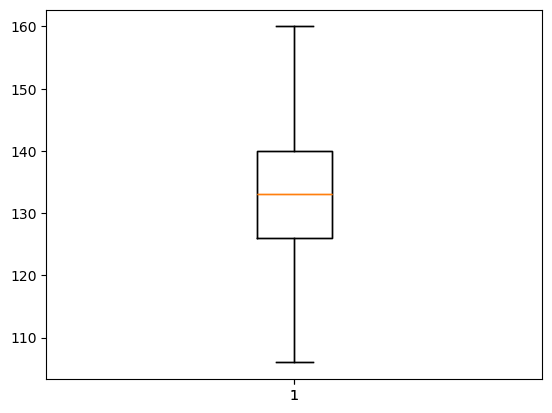

In [404]:
# handling outliers of LB column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_lb=plt.boxplot(df_cleaned.loc[:,'LB'])
Extremes=[item.get_ydata()[1] for item in box_lb['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'LB']>UE,"LB"]=UE   # if outliers are present above upper extreme equating it with upper extreme
df_cleaned.loc[df_cleaned.loc[:,'LB']<LE,"LB"]=LE  #if outliers are present below lower extreme equating it with lower extreme
box_lb=plt.boxplot(df_cleaned.loc[:,'LB'])


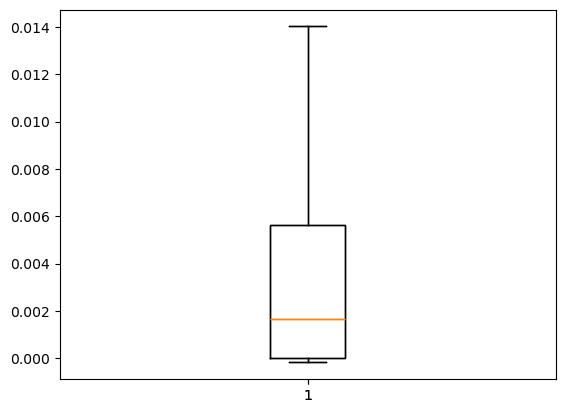

In [406]:
# handling outliers of AC column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_ac=plt.boxplot(df_cleaned.loc[:,'AC'])
Extremes=[item.get_ydata()[1] for item in box_ac['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'AC']>UE,"AC"]=UE
df_cleaned.loc[df_cleaned.loc[:,'AC']<LE,"AC"]=LE
box_ac=plt.boxplot(df_cleaned.loc[:,'AC'])

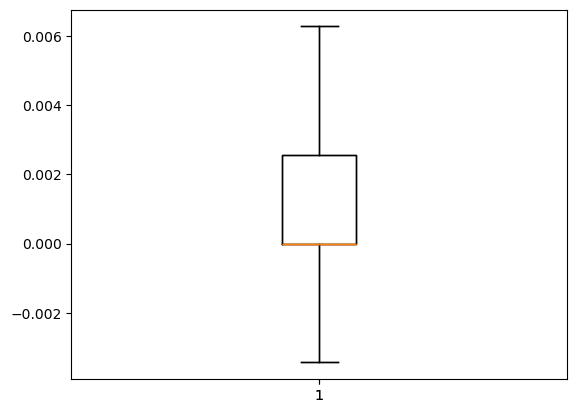

In [408]:
# handling outliers of FM column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_fm=plt.boxplot(df_cleaned.loc[:,'FM'])
Extremes=[item.get_ydata()[1] for item in box_fm['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'FM']>UE,"FM"]=UE
df_cleaned.loc[df_cleaned.loc[:,'FM']<LE,"FM"]=LE
box_fm=plt.boxplot(df_cleaned.loc[:,'FM'])

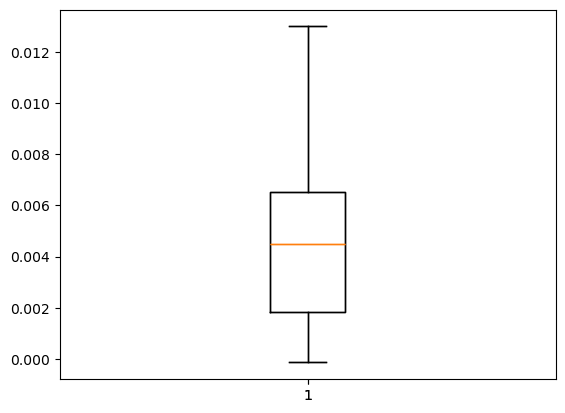

In [410]:
# handling outliers of UC column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_uc=plt.boxplot(df_cleaned.loc[:,'UC'])
Extremes=[item.get_ydata()[1] for item in box_uc['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'UC']>UE,"UC"]=UE
df_cleaned.loc[df_cleaned.loc[:,'UC']<LE,"UC"]=LE
box_fm=plt.boxplot(df_cleaned.loc[:,'UC'])

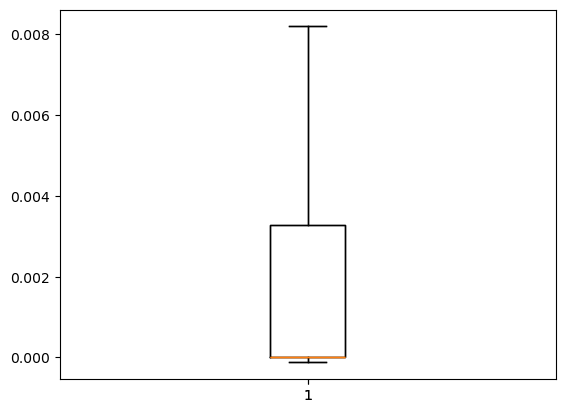

In [412]:
# handling outliers of DL column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_dl=plt.boxplot(df_cleaned.loc[:,'DL'])
Extremes=[item.get_ydata()[1] for item in box_dl['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'DL']>UE,"DL"]=UE
df_cleaned.loc[df_cleaned.loc[:,'DL']<LE,"DL"]=LE
box_dl=plt.boxplot(df_cleaned.loc[:,'DL'])

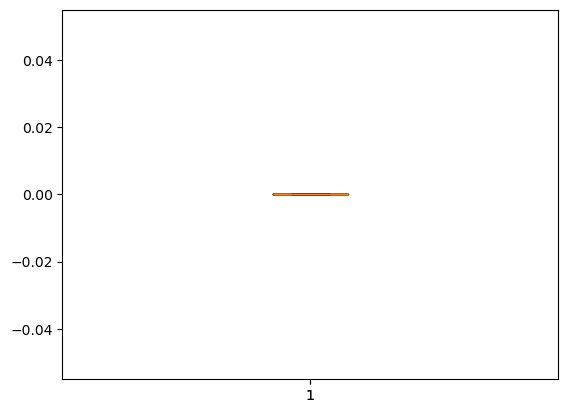

In [414]:
# handling outliers of DS column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_ds=plt.boxplot(df_cleaned.loc[:,'DS'])
Extremes=[item.get_ydata()[1] for item in box_ds['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'DS']>UE,"DS"]=UE
df_cleaned.loc[df_cleaned.loc[:,'DS']<LE,"DS"]=LE
box_ds=plt.boxplot(df_cleaned.loc[:,'DS'])

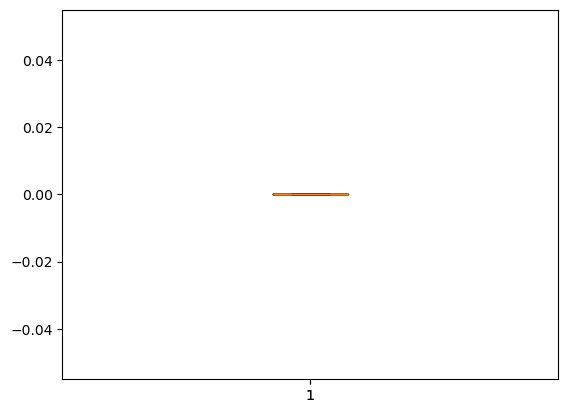

In [416]:
# handling outliers of DP column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_dp=plt.boxplot(df_cleaned.loc[:,'DP'])
Extremes=[item.get_ydata()[1] for item in box_dp['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'DP']>UE,"DP"]=UE
df_cleaned.loc[df_cleaned.loc[:,'DP']<LE,"DP"]=LE
box_dp=plt.boxplot(df_cleaned.loc[:,'DP'])                     

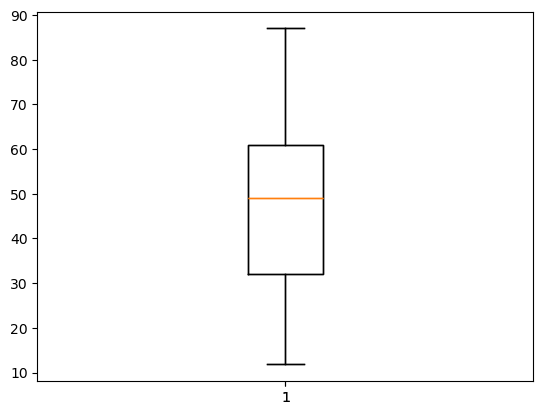

In [418]:
# handling outliers of ASTV column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_astv=plt.boxplot(df_cleaned.loc[:,'ASTV'])
Extremes=[item.get_ydata()[1] for item in box_astv['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'ASTV']>UE,"ASTV"]=UE
df_cleaned.loc[df_cleaned.loc[:,'ASTV']<LE,"ASTV"]=LE
box_astv=plt.boxplot(df_cleaned.loc[:,'ASTV'])                     

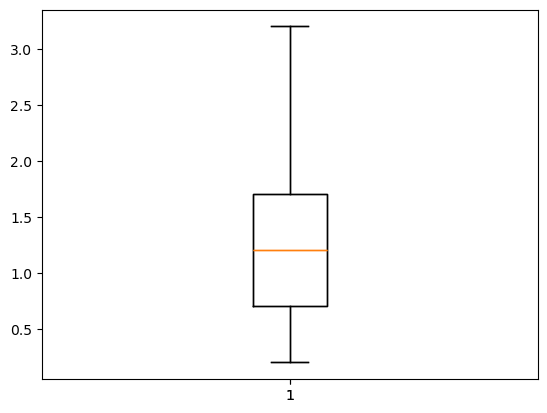

In [420]:
# handling outliers of MSTV column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_mstv=plt.boxplot(df_cleaned.loc[:,'MSTV'])
Extremes=[item.get_ydata()[1] for item in box_mstv['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'MSTV']>UE,"MSTV"]=UE
df_cleaned.loc[df_cleaned.loc[:,'MSTV']<LE,"MSTV"]=LE
box_mstv=plt.boxplot(df_cleaned.loc[:,'MSTV'])                     

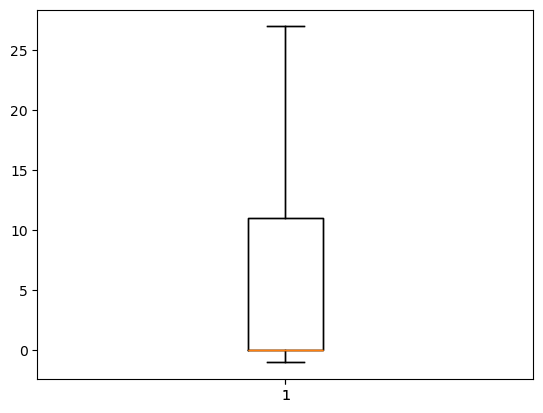

In [422]:
# handling outliers of ALTV column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_altv=plt.boxplot(df_cleaned.loc[:,'ALTV'])
Extremes=[item.get_ydata()[1] for item in box_altv['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'ALTV']>UE,"ALTV"]=UE
df_cleaned.loc[df_cleaned.loc[:,'ALTV']<LE,"ALTV"]=LE
box_altv=plt.boxplot(df_cleaned.loc[:,'ALTV'])                     

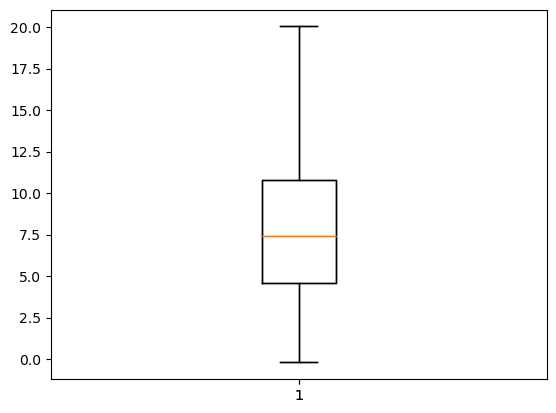

In [424]:
# handling outliers of MLTV column   (run the cell once to see boxplot with outliers and run it twice to see boxplot after handling outliers)
box_mltv=plt.boxplot(df_cleaned.loc[:,'MLTV'])
Extremes=[item.get_ydata()[1] for item in box_mltv['whiskers']] 
UE=Extremes[1]
LE=Extremes[0]
df_cleaned.loc[df_cleaned.loc[:,'MLTV']>UE,"MLTV"]=UE
df_cleaned.loc[df_cleaned.loc[:,'MLTV']<LE,"MLTV"]=LE
box_mltv=plt.boxplot(df_cleaned.loc[:,'MLTV'])  

In [426]:
#  2.	Statistical Summary:
df_cleaned.describe()  #interquartile range =75%-25%


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.0,2124.0,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.287779,0.003149,0.001548,0.004372,0.001784,0.0,0.0,47.011988,1.305967,6.645658,8.011369
std,9.913760,0.003800,0.002438,0.002971,0.002643,0.0,0.0,17.347869,0.778394,10.200124,5.019659
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,0.0,0.0,11.799846,0.200000,-1.043619,-0.200788
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,10.800000
max,160.000000,0.014024,0.006272,0.012987,0.008197,0.0,0.0,87.000000,3.200000,27.000000,20.040354


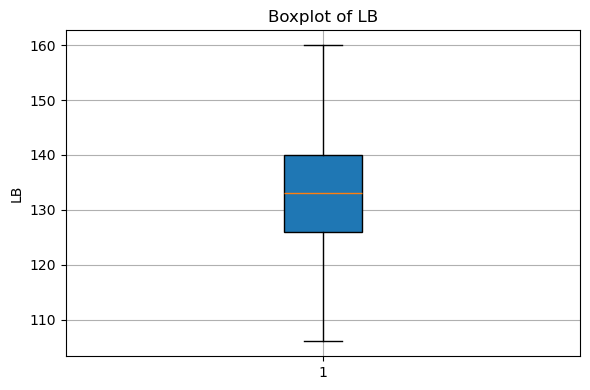

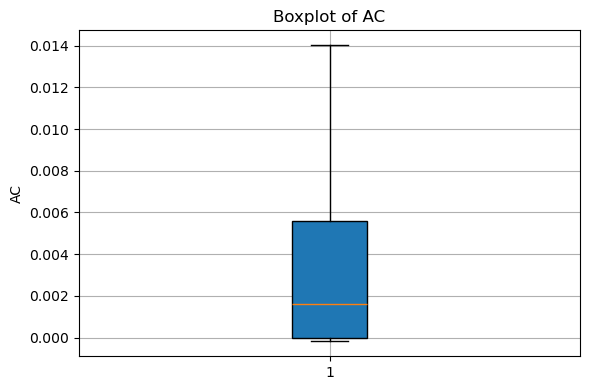

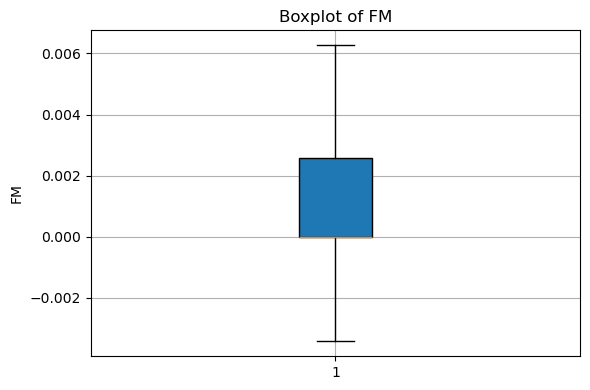

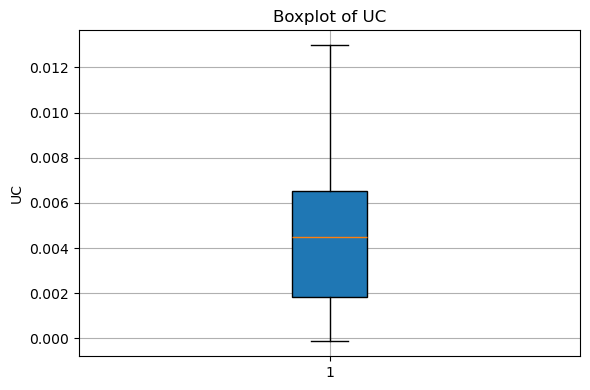

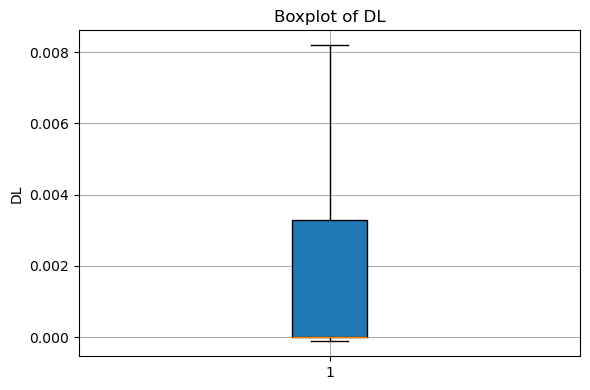

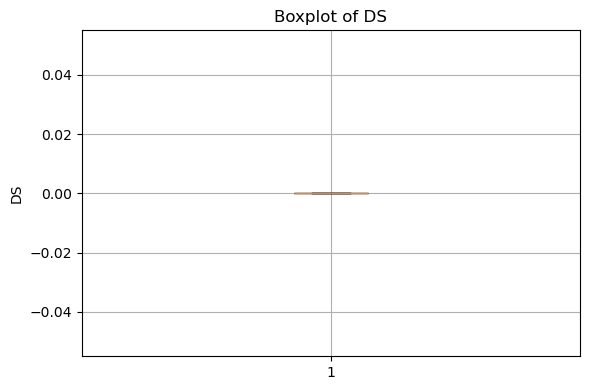

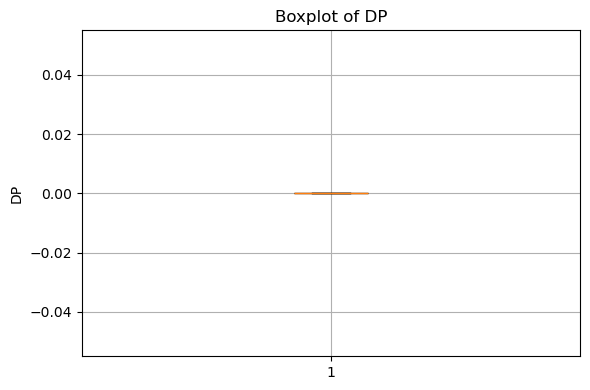

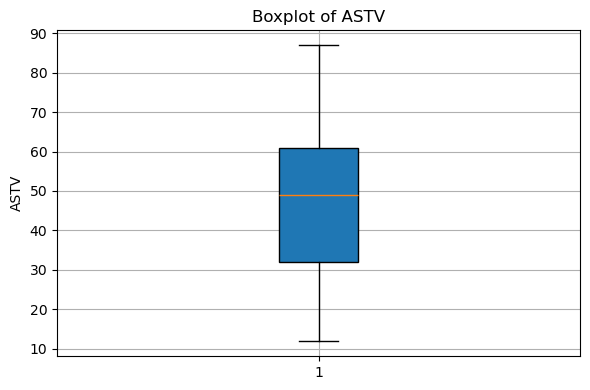

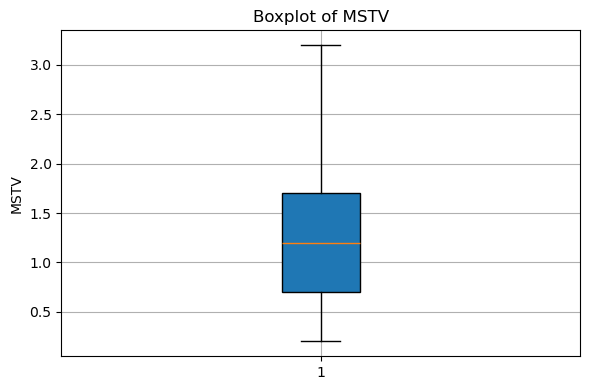

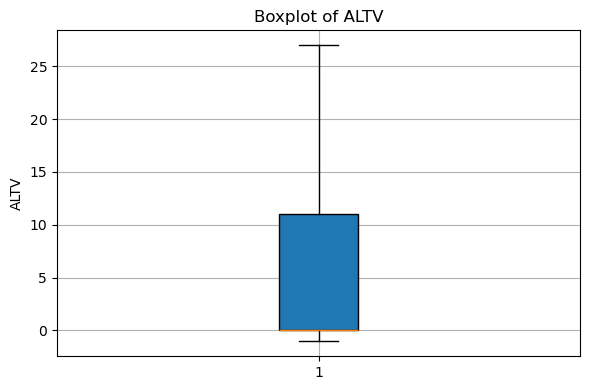

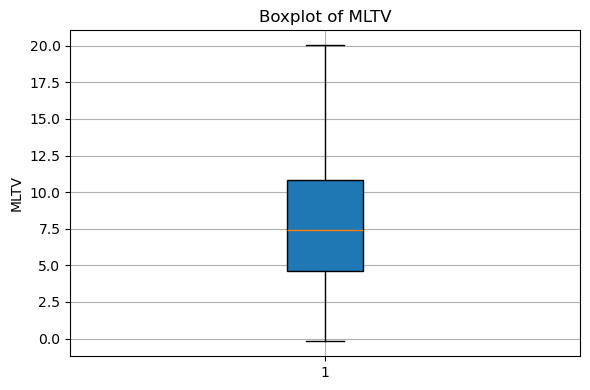

In [428]:
# 3. Data Visualization:
# Create boxplots for each column
for column in df_cleaned.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df_cleaned[column], patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [429]:
# plotting bar or pie chart on categorical columns ,since there are no categorical columns we cannot plot
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns # checking if there are any categorical coluns to plot bar or pie chart 
categorical_columns

Index([], dtype='object')

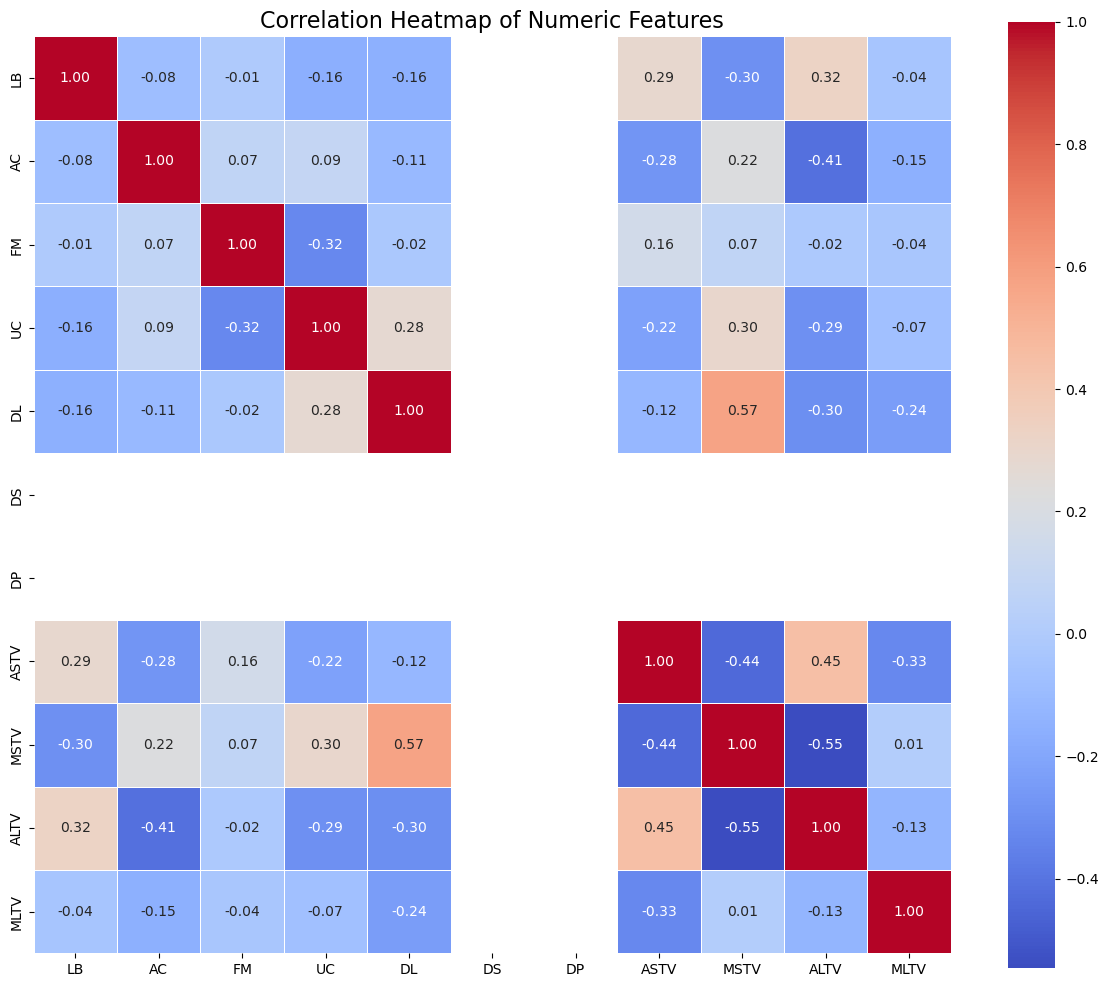

In [430]:
# generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df_cleaned.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

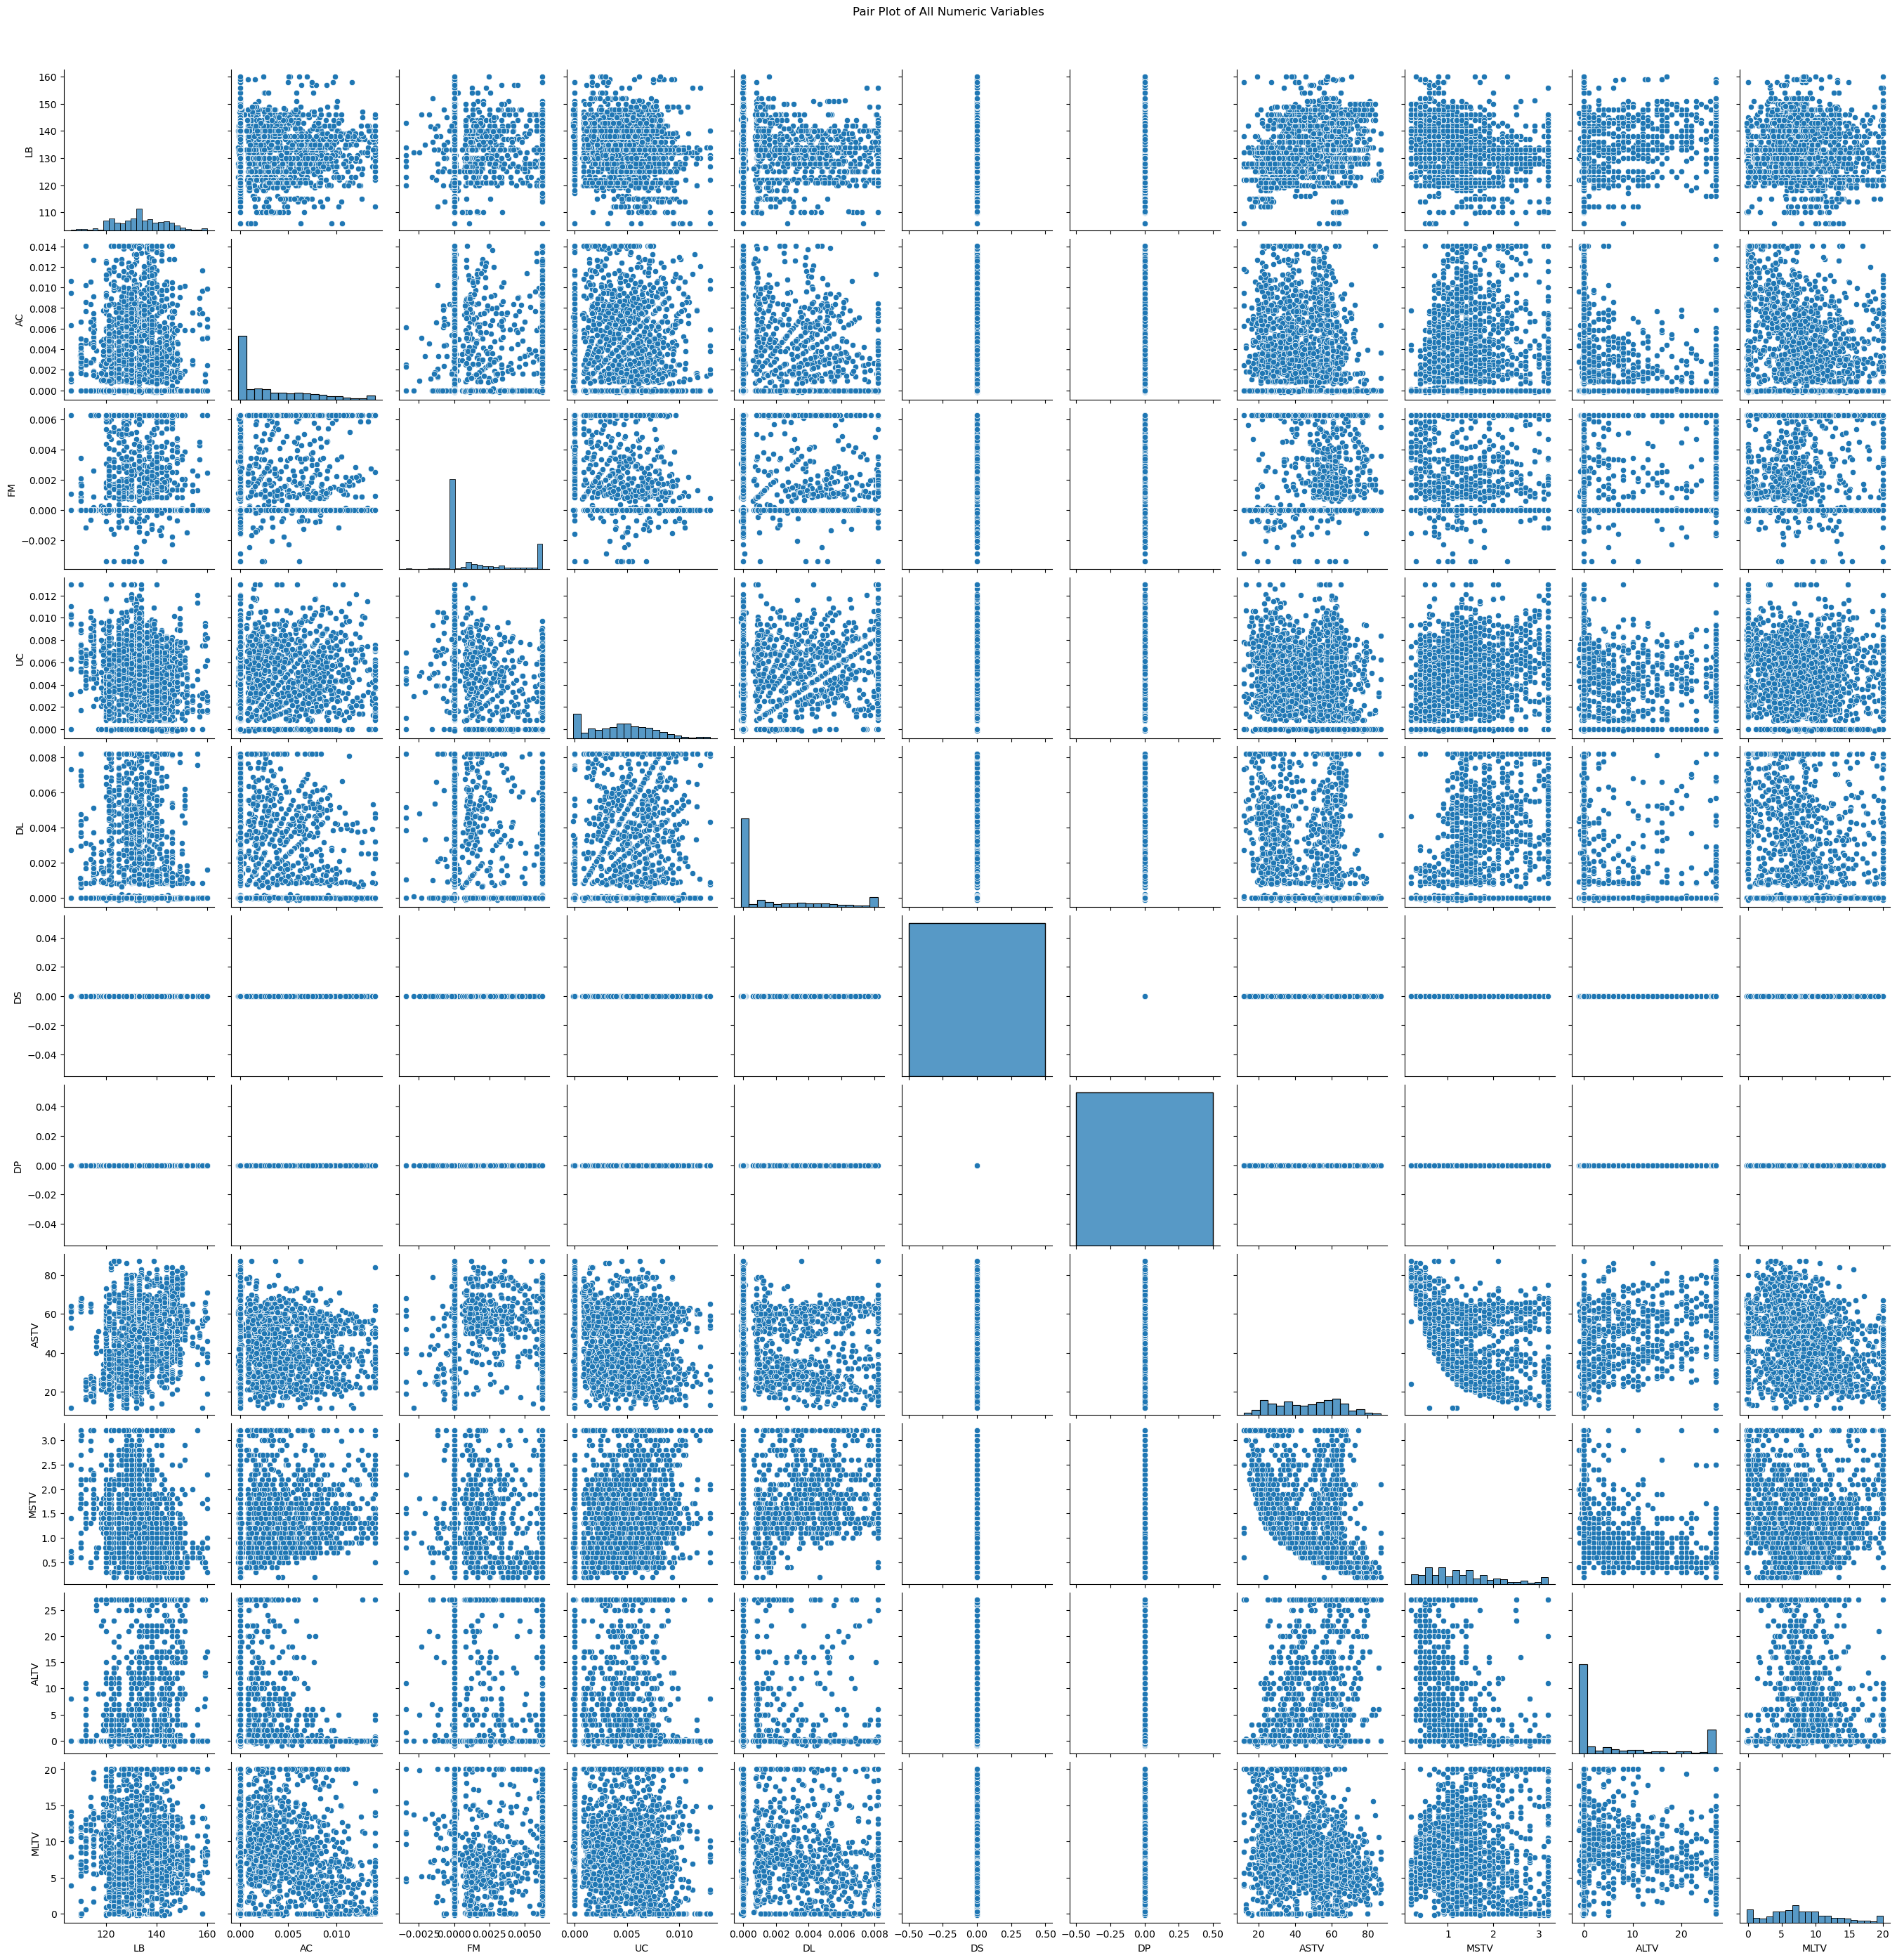

In [434]:
# Creating pair plots
sns.pairplot(df_cleaned, diag_kind='hist')
plt.suptitle("Pair Plot of All Numeric Variables", y=1.02)
plt.show()

In [435]:
# 4.  Pattern Recognition and Insights:
# Computing correlation matrix
corr_matrix = df_cleaned.corr()     # from the correlation matrix we can conclude No correlation coefficient is greater than 0.7 or less than -0.7 (i.e., no strong correlation), except the diagonal 1.0 values.  
corr_matrix


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
LB,1.000000,-0.083249,-0.006837,-0.161087,-0.157375,NaN,NaN,0.290247,-0.297598,0.324766,-0.043340
AC,-0.083249,1.000000,0.074759,0.092703,-0.107978,NaN,NaN,-0.275204,0.220983,-0.414383,-0.153153
FM,-0.006837,0.074759,1.000000,-0.323791,-0.021209,NaN,NaN,0.158547,0.073174,-0.015696,-0.037136
UC,-0.161087,0.092703,-0.323791,1.000000,0.277808,NaN,NaN,-0.223463,0.299588,-0.294256,-0.073196
DL,-0.157375,-0.107978,-0.021209,0.277808,1.000000,NaN,NaN,-0.119134,0.573598,-0.302482,-0.243045
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.290247,-0.275204,0.158547,-0.223463,-0.119134,NaN,NaN,1.000000,-0.440538,0.445417,-0.327287
MSTV,-0.297598,0.220983,0.073174,0.299588,0.573598,NaN,NaN,-0.440538,1.000000,-0.545534,0.011833
ALTV,0.324766,-0.414383,-0.015696,-0.294256,-0.302482,NaN,NaN,0.445417,-0.545534,1.000000,-0.132878


In [ ]:
# 5 conclusion
# Several variables contain outliers and skewed distributions.
# No correlation coefficient is greater than 0.7 or less than -0.7 (i.e., no strong correlation), except the diagonal 1.0 values.
# Most features are independent, with low intercorrelation.